## Downloading and cleaning up the data

In [ ]:
# Download the python packages
!pip install yfinance --upgrade --no-cache-dir
!pip install ta
!pip install datasets

     ---------------------------------------- 73.0/73.0 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138452 sha256=5dc1a1a8c203251027569ec1dd7d552cf490b09c6f045a32452cba4ff1276a07
  Stored in directory: C:\Users\rober\AppData\Local\Temp\pip-ephem-wheel-cache-ewj3f_pw\wheels\0b\ae\ec\bc17d5247792d19d7f3abd30f787ab392b29c6e7075e6cdaf3
Successfully built peewee
  Attempting uninstall: r

In [ ]:
# yfinance is the API and ta is a technical analysis tool
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# For data manupilation
import pandas as pd

In [ ]:
def pull_stock_data(stocks, start_date, end_date, interval):
    stock_data = dict()

    for stock in stocks:
        stock_data[stock] = yf.download(stock, start=start_date, end=end_date, interval=interval)
        if len(stock_data[stock])==0:
          del stock_data[stock]

    return stock_data

def pull_stock_indicators(stock_data):

    for stock in stock_data.keys():
        # Adding simple moving average 20 and 50
        stock_data[stock]['SMA_20'] = ta.trend.sma_indicator(close=stock_data[stock]['Close'], window=20)
        stock_data[stock]['SMA_50'] = ta.trend.sma_indicator(close=stock_data[stock]['Close'], window=50)

        # Adding stochastic oscillators
        stock_data[stock]['%K'] = ta.momentum.stoch(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)
        stock_data[stock]['%D'] = ta.momentum.stoch_signal(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)

        # Adding RSI indicator
        stock_data[stock]['RSI'] = ta.momentum.RSIIndicator(close=stock_data[stock]['Close'], window=14).rsi()

        # Calculate Bollinger Bands
        bollinger_bands = ta.volatility.BollingerBands(close=stock_data[stock]['Close'], window=20, window_dev=2)

        # Add Bollinger Bands
        stock_data[stock]['BB_Middle'] = bollinger_bands.bollinger_mavg()
        stock_data[stock]['BB_Upper'] = bollinger_bands.bollinger_hband()
        stock_data[stock]['BB_Lower'] = bollinger_bands.bollinger_lband()

        # Calculate MACD
        macd = ta.trend.MACD(close=stock_data[stock]['Close'], window_fast=12, window_slow=26, window_sign=9)

        # Add MACD and signal line
        stock_data[stock]['MACD'] = macd.macd()
        stock_data[stock]['MACD_Signal'] = macd.macd_signal()

        # Calculate ATR
        atr = ta.volatility.AverageTrueRange(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)

        # Add ATR
        stock_data[stock]['ATR'] = atr.average_true_range()

    return stock_data

def cleaning_data(stock_data):
    temp_dict = dict()

    for stock in stock_data.keys():
      try:
          temp_dict[stock_data[stock].shape][stock] = stock_data[stock]
      except:
          temp_dict[stock_data[stock].shape] = dict()
          temp_dict[stock_data[stock].shape][stock] = stock_data[stock]

    max_l = max([len(temp_dict[shape]) for shape in temp_dict.keys()])

    for shape in temp_dict.keys():
      if len(temp_dict[shape])==max_l:
        stock_data = temp_dict[shape]
        break

    # Remove all rows where there is a nan/non number entry
    for stock in stock_data.keys():
      stock_data[stock] = stock_data[stock].dropna()

    return stock_data

In [ ]:
# Obtaining the SNP 500 companies
stock_dfs = {}

all_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

all_stocks = all_tickers.Symbol.to_list()
# print("SNP500 stocks: "+str(stocks))

tech = ['GOOG', 'T', 'EA', 'META', 'NFLX', 'AMZN', 'ABNB', 'ADBE', 'ORCL', 'CRM',]
comm = ['T', 'VZ', 'CMCSA', 'TMUS', 'CHTR']
defense = ['BA', 'GE', 'GD', 'LHX', 'LMT', 'NOC', 'RTX']
finance = ['BK', 'BX', 'IVZ', 'STT', 'TROW', 'BAC', 'C', 'FITB', 'JPM', 'WFC']


In [ ]:
full_stock_data = pull_stock_data(all_stocks, '2023-01-01', '2024-01-01', '1h')
full_stock_data = pull_stock_indicators(full_stock_data)
full_stock_data = cleaning_data(full_stock_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
# Setting up data for AAPL
tech_stock_data = pull_stock_data(tech, '2023-01-01', '2024-01-01', '1h')
tech_stock_data = pull_stock_indicators(tech_stock_data)
tech_stock_data = cleaning_data(tech_stock_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# code for importing stocks by sector

industry = None

if industry == 'tech':
  stock_data = tech_stock_data
else:
  stock_data = full_stock_data


path = os.path.join(r'/Users/rob/Desktop/CS4701/Data')

for key in stock_data.keys():
  csv = stock_data[key].to_csv(key + '.csv')
  files.download(key + '.csv')

## LSTM Model

In [ ]:
import sklearn.preprocessing as sklp
import sklearn.model_selection as sklm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np

c:\Users\rober\.conda\envs\orie_3310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

tickers = list(stock_data.keys())
stock_dfs = []

for i in range(0, len(tickers)):
  stock_dfs.append(stock_data[tickers[i]])

print(len(stock_dfs))

484


In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, n_lags, forecast_horizon=1, feature_cols=None, label_col='Close', normalize=True):
        self.n_lags = n_lags
        self.forecast_horizon = forecast_horizon
        self.label_col = label_col

        #allow selection of features
        if feature_cols:
          data = data[feature_cols]
        else:
          data = data[data.columns]

        #normalize features
        if normalize:
          self.scaler = sklp.MinMaxScaler()
          data_scaled = self.scaler.fit_transform(data)

        #create usable data from scaled df
        self.X, self.y = self.create_sequences(data_scaled)

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.n_lags - self.forecast_horizon + 1):
          X.append(data[i:i + self.n_lags])
          y.append(data[i + self.n_lags + self.forecast_horizon - 1, 3])

        return np.array(X), np.array(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

In [ ]:
#params for dataloader
b = 6
f = 1

num_stocks = 100 # number of stocks to use

n_lags = 8 * 21 * b #look back n MONTHS: hours/market-day * days * quantity
forecast_horizon = 8 * 5 * f #look ahead f WEEKS (5 trading days/week):

ts_datasets = []

for i in range(0, num_stocks):
  ts_datasets.append(TimeSeriesDataset(stock_dfs[i], n_lags, forecast_horizon))

print(len(ts_datasets))

484


# LSTM Model:

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_layers, input_size, hidden_size, seq_length, num_classes=1):
        """
        Inputs:
        num_layers: Number of recurrent layers
        input_size: Number of features for input
        hidden_size: Number of features in hidden state
        **these could be wrong**
        seq_length: Length of sequences in a batch
        num_classes: Number of categories for labels

        Outputs: none
        """
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        self.dense = nn.Sequential(
            nn.Linear(num_layers * hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
      '''
      Inputs:
      x: input data

      Outputs:
      out: output of forward pass
      '''

      out, (hn, cn) = self.lstm(x)

      hn = hn.transpose(0, 1).reshape(x.size(0), -1)

      x = self.dense(hn)

      return x

### Data Processing

In [ ]:
tvt_datasets = []

for i in range(len(ts_datasets)):
  train_size = int(0.8 * len(ts_datasets[i]))
  val_size = int(0.1 * len(ts_datasets[i]))
  test_size = len(ts_datasets[i]) - train_size - val_size
  train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(ts_datasets[i], [train_size, val_size, test_size])
  tvt_datasets.append((train_dataset, val_dataset, test_dataset))

In [ ]:
tvt_dataloaders = []

for i in range(len(tvt_datasets)):
  train_dataset, val_dataset, test_dataset = tvt_datasets[i]
  train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
  test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
  tvt_dataloaders.append((train_dataloader, val_dataloader, test_dataloader))

### Train + Validation Logic

In [ ]:
def val(model, val_loader, criterion):
    """
    Inputs:
    model (torch.nn.Module): The deep learning model to be trained.
    val_data_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
    criterion (torch.nn.Module): Loss function to compute the training loss.

    Outputs:
    Validation Loss
    """
    val_running_loss = 0
    num_correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader, 0):
            labels = labels.view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()


    return val_running_loss

In [ ]:
def train(model, tvt_loaders, criterion, epochs, optimizer):
  """
    Inputs:
    model (torch.nn.Module): The deep learning model to be trained.
    train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
    val_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
    criterion (torch.nn.Module): Loss function to compute the training loss.
    epochs: Number of epochs to train for.
    optimizer: The optimizer to use during training.

    Outputs:
    Tuple of (train_loss_arr, val_loss_arr, val_acc_arr)
  """
  train_loss_arr = []
  val_loss_arr = []
  model.train()
    
  count = 0

  for epoch in range(epochs):
      count = 0
      for train_loader, val_loader, _ in tvt_loaders:
        
        running_loss = 0.0
        count += 1
        for i, (inputs, labels) in enumerate(train_loader, 0):

          labels = labels.view(-1, 1)

          optimizer.zero_grad()
          preds = model(inputs)
          loss = criterion(preds, labels)

          running_loss += loss.item()

          loss.backward()
          optimizer.step()


        val_loss = val(model, val_loader, criterion)
        train_loss_arr.append(running_loss)
        val_loss_arr.append(val_loss)

        print("epoch:", epoch+1, "trial", count, "training loss:", running_loss)

  print(running_loss)
  print('Training finished.')

  return train_loss_arr, val_loss_arr

In [ ]:
def predict(model, test_loaders):
  model.eval()
  print(len(train_dataset))

  for i in range(len(test_loaders)):
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(test_dataloader):
        print(i)
        print(f"Input shape: {inputs.shape}")  # Check input shape
        print(f"Sample input: {inputs[0]}")     # Inspect the first input of the batch

        output = model(inputs)
        print(f"Output: {output}")  # Print output

In [ ]:
num_layers = 2 # Number of LSTM recurrent layers
input_size = 17 # Number of features for input
hidden_size = 16 # Number of features in hidden state
seq_length = 17 # Length of sequences in a batch
num_classes = 1 # Predicted output value

batch_size = 32 # Batch size: number of samples that will be propagated through the network at once

# you may change the learning rate and numbers of epochs run
learning_rate = 0.0001 # Learning rate: determines the step size at each iteration while moving toward a minimum of a loss function
lstm_epochs = 8 # Number of epochs: number of times the entire dataset will be passed through the network

criterion = nn.MSELoss() # Loss function: Mean Squared Error 

lstm_model = LSTM(num_layers, input_size, hidden_size, seq_length, num_classes) # Initialize LSTM model based on the parameters

optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate) # Initialize optimizer: Adam optimizer

lstm_train_loss, lstm_val_loss = train(lstm_model, tvt_dataloaders, criterion, lstm_epochs, optimizer) # Run training

torch.save(lstm_model.state_dict(), 'last_large_lstm_model_state_dict.pth') # Change the name of the file to save the model!!

epoch: 1 trial 1 training loss: 0.17415676638484
epoch: 1 trial 2 training loss: 0.20290744584053755
epoch: 1 trial 3 training loss: 0.11934223212301731
epoch: 1 trial 4 training loss: 0.12200629711151123
epoch: 1 trial 5 training loss: 0.6809547692537308
epoch: 1 trial 6 training loss: 0.23699750285595655
epoch: 1 trial 7 training loss: 0.3530936688184738
epoch: 1 trial 8 training loss: 0.5426320433616638
epoch: 1 trial 9 training loss: 0.37529049068689346
epoch: 1 trial 10 training loss: 0.05788796208798885
epoch: 1 trial 11 training loss: 0.09171219170093536
epoch: 1 trial 12 training loss: 0.23325257003307343
epoch: 1 trial 13 training loss: 0.4740568548440933
epoch: 1 trial 14 training loss: 0.5988186746835709
epoch: 1 trial 15 training loss: 0.14093885198235512
epoch: 1 trial 16 training loss: 0.09825443476438522
epoch: 1 trial 17 training loss: 0.22428283467888832
epoch: 1 trial 18 training loss: 0.07008695974946022
epoch: 1 trial 19 training loss: 0.18265777453780174
epoch: 1 t

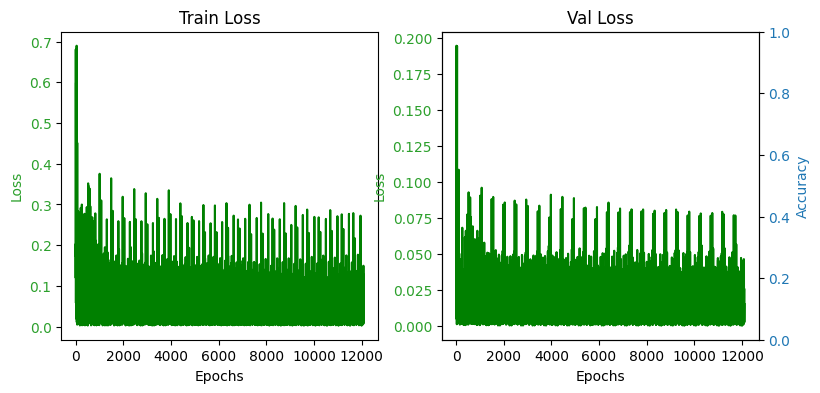

In [ ]:
x = [epoch+1 for epoch in range(lstm_epochs*len(tvt_dataloaders))]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.title.set_text('Train Loss')
ax1.plot(x, lstm_train_loss, color='green',label='Train Loss')

ax2.title.set_text('Val Loss')
ax2.plot(x, lstm_val_loss, color='green',label='Loss')

ax3 = ax2.twinx()

color = 'tab:blue'
ax3.set_ylabel('Accuracy', color=color)
# ax3.plot(x, lstm_val_acc, color=color)
ax3.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.set_ylabel('Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")

plt.show()

In [ ]:
lstm_loss = val(lstm_model, test_dataloader, criterion)


print(f"Test Loss (LSTM): {lstm_loss:.2f}")

Test Loss (LSTM): 0.01


In [ ]:
lstm_model.eval()
print(len(test_dataset))

with torch.no_grad():
  for i, (inputs, labels) in enumerate(test_dataloader):
    print(i)
    print(f"Input shape: {inputs.shape}")  # Check input shape
    # print(f"Sample input: {inputs[0]}")     # Inspect the first input of the batch

    output = lstm_model(inputs)
    print(f"Output: {list(zip(output, labels))}")  # Print output

lstm_model.train()

21
0
Input shape: torch.Size([64, 1440, 17])
Output: [(tensor([0.6187]), tensor(0.8027)), (tensor([0.5739]), tensor(0.5358)), (tensor([0.6503]), tensor(0.6188)), (tensor([0.5756]), tensor(0.5244)), (tensor([0.4817]), tensor(0.5093)), (tensor([0.5955]), tensor(0.4823)), (tensor([0.8830]), tensor(0.9118)), (tensor([0.7039]), tensor(0.9382)), (tensor([0.6264]), tensor(0.6701)), (tensor([0.5853]), tensor(0.5427)), (tensor([0.6595]), tensor(0.9020)), (tensor([0.5128]), tensor(0.5654)), (tensor([0.6144]), tensor(0.7665)), (tensor([0.6064]), tensor(0.5904)), (tensor([0.6103]), tensor(0.6083)), (tensor([0.8536]), tensor(0.8731)), (tensor([0.6729]), tensor(0.6176)), (tensor([0.5931]), tensor(0.5416)), (tensor([0.8898]), tensor(0.9046)), (tensor([0.5135]), tensor(0.5606)), (tensor([0.8275]), tensor(0.8699)), (tensor([0.7237]), tensor(0.9532)), (tensor([0.6136]), tensor(0.7948)), (tensor([0.4904]), tensor(0.4972)), (tensor([0.8810]), tensor(0.9265)), (tensor([0.6218]), tensor(0.6500)), (tensor([0

LSTM(
  (lstm): LSTM(17, 16, num_layers=4, batch_first=True)
  (dense): Sequential(
    (0): ReLU()
    (1): Linear(in_features=64, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=1, bias=True)
  )
)

### Predicting Change From Current Stock Price

In [ ]:
# Predict the stock price for all stocks, pick the 10 best performing stocks and the 10 worst performing stocks
# Use the LSTM model to predict the stock price for the next 5 days
for i in range(len(tvt_dataloaders)):
  train_loader, val_loader, test_loader = tvt_dataloaders[i]
  predict(lstm_model, test_loader)

# Calculate the percentage change in stock price for each stock
# Take the current stock price and the stock price 5 days from now
curr_stock_price = stock_data['Close']
# Sort the stocks based on the percentage change in stock price
# Pick the top 10 and bottom 10 stocks


In [ ]:
#